<a href="https://colab.research.google.com/github/hargurjeet/Suprise_Housing/blob/main/Suprise_Housing_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Suprise House Pricing Case Study**

The case study provide a detailed analysis of housing prices within Australia and how Suprise Housing company leverage this information to buy houses at low prices and sell them at high prices

  # **Table Of Contents**<a name="top"></a>


---



---

  
  1. [About the Dataset](#1)
  2. [Data Understanding](#2)
  3. [Expainatory Data Analysis](#3)
  4. [Data Prepartion](#4)
  5. [Model Building](#5)
  6. [Evaluation on Test set](#6)
  7. [Summary & Conclusion](#7)
  8. [References](#8)

# 4: Data Prepartion <a name="4"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# 5: Model Building <a name="5"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# 6: Evaluations <a name="6"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# 7: Summary & Conclusion <a name="7"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# 8: Reference <a name="8"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# 1: AboutDataset <a name="1"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

The dataset contains around 1500 records covering various details of house prices along with it sales/house pricing information.

In [92]:
## Data preprocessing libraries
import pandas as pd
import numpy as np
from numpy import arange

## Libraries for building visuals
import seaborn as sns
import matplotlib.pyplot as plt

# libraries for data preprocessing
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Libraries for building ML models
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Libraries for Model Evaluations
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Libraries for hyperparameter tuning
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

# Libraries to supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [93]:
input_url = 'https://raw.githubusercontent.com/hargurjeet/Suprise_Housing/main/train.csv'
raw_data = pd.read_csv(input_url)
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2: Data Understanding <a name="2"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [94]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Key observation** - 
- No nul values within the dataset. Few columns seems to have extermely high number of null values.
- High number of both Categorical and numberica columns.

# 3: Explainatory Data Analysis <a name="3"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [95]:
# Identifying and removing columns having missing values over 40%
pd.set_option('display.max_rows', None)
columns_with_high_missing_values = raw_data.columns[[((raw_data.isnull().sum()/len(raw_data))*100 > 40)]]
columns_with_high_missing_values

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [96]:
print('Total number of columns within the dataset', len(raw_data.columns))
raw_data = raw_data.drop(labels=columns_with_high_missing_values, axis=1)

# Id colums seems to be irrelevant as well
raw_data = raw_data.drop(labels='Id', axis=1)
print('Total number of columns left after dropping the columns', len(raw_data.columns))

Total number of columns within the dataset 81
Total number of columns left after dropping the columns 75


In [99]:
# As total number of columns are pretty high
# let us identify the numberical and categorical columns
raw_data_numberic = raw_data.select_dtypes(include=['number'])
raw_data_cat = raw_data.select_dtypes(include=['object'])
print('Total numberic columns', len(raw_data_numberic.columns))
print('Total categorical columns', len(raw_data_cat.columns))

Total numberic columns 37
Total categorical columns 38


In [101]:
# Analysing Numberical columns
raw_data_numberic.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


## Univarite Analysis

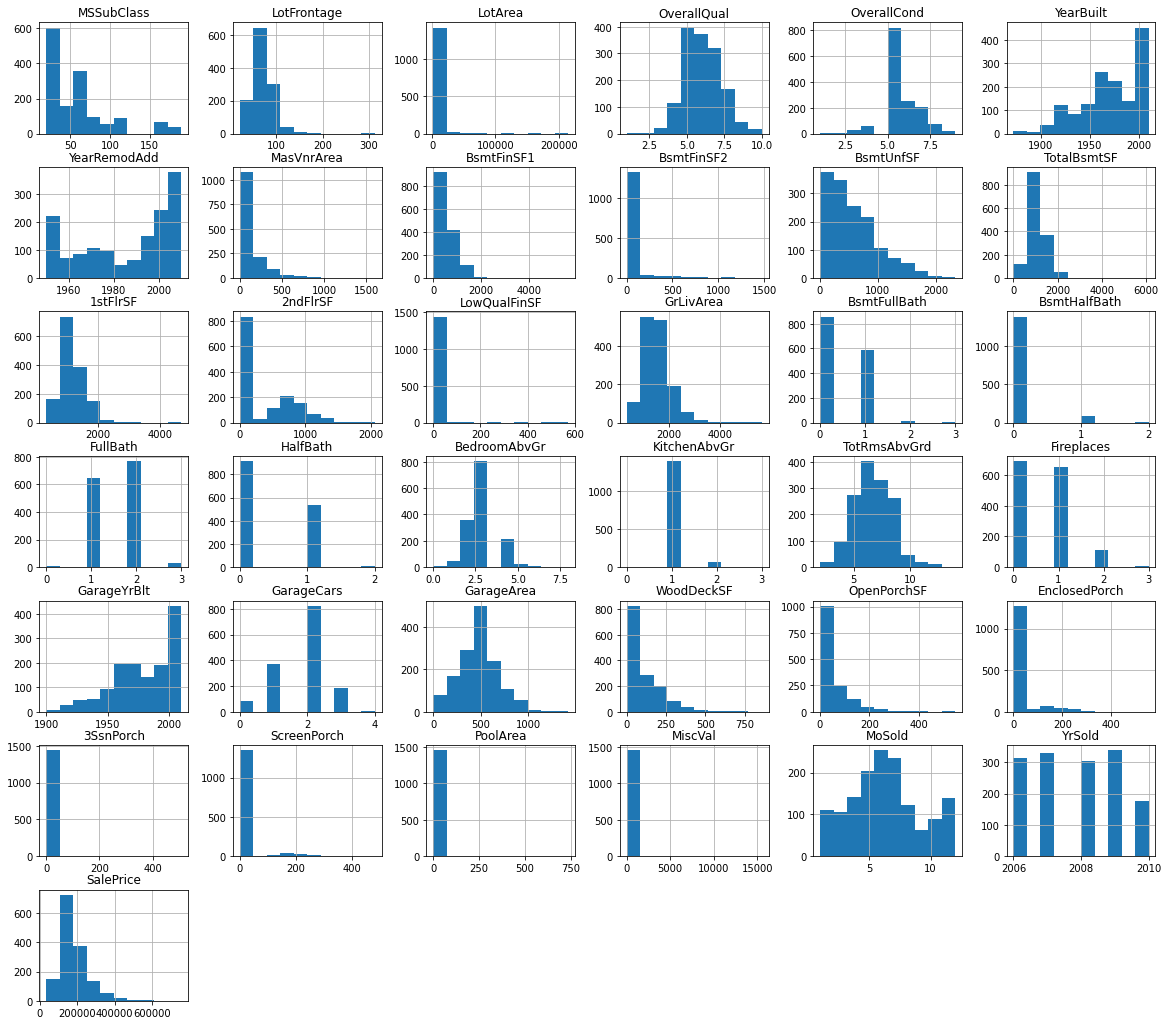

In [113]:
raw_data_numberic.hist(figsize=(20,18))
plt.show()

** - Key obervations **
- For few columns most of the values seems zero. They are  'BsmtFinSF2', 'LowQualFinSF','EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal'. As these columns doesnt contain much info I plan to drop these columns

- Few columns can be categorised as catergory columns as they done contain continous values they are - 'BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath', 'KitchenAbvGr','Fireplaces', 'GarageCars'.

In [123]:
raw_data_numberic.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [136]:
raw_data_numberic['BsmtFullBath'].sort_values().value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

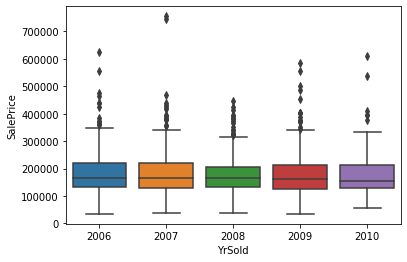

In [102]:
sns.boxplot(y=raw_data_numberic.SalePrice, x=raw_data_numberic.YrSold, data=raw_data_numberic)

In [6]:
X = raw_data.drop('SalePrice', axis=1)
y = raw_data['SalePrice']

In [7]:
y.shape

(1460,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Imputation

In [9]:
## seprating numberical and categorical columns
X_train_numberic = X_train.select_dtypes(include=['number'])
X_train_cat = X_train.select_dtypes(include=['object'])

In [10]:
print(X_train_cat.shape, X_train_numberic.shape)

(978, 38) (978, 36)


In [11]:
pd.set_option('display.max_column', None)
X_train_numberic.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
615,85,80.0,8800,6,7,1963,1963,156.0,763,0,173,936,1054,0,0,1054,1,0,1,0,3,1,6,0,1963.0,2,480,120,0,0,0,0,0,0,5,2010
613,20,70.0,8402,5,5,2007,2007,0.0,206,0,914,1120,1120,0,0,1120,0,0,1,0,3,1,6,0,NaN,0,0,0,30,0,0,0,0,0,12,2007
1303,20,73.0,8688,7,5,2005,2005,228.0,0,0,1616,1616,1616,0,0,1616,0,0,2,0,3,1,7,0,2005.0,3,834,208,59,0,0,0,0,0,4,2006
486,20,79.0,10289,5,7,1965,1965,168.0,836,0,237,1073,1073,0,0,1073,1,0,1,1,3,1,6,0,1965.0,2,515,0,0,0,0,0,0,0,6,2007
561,20,77.0,10010,5,5,1974,1975,0.0,1071,123,195,1389,1389,0,0,1389,1,0,1,0,2,1,6,1,1975.0,2,418,240,38,0,0,0,0,0,4,2006


In [12]:
## Observing few column can be classifed as catergorical instead on numberical
cat_cols = ['YearBuilt', 'GarageYrBlt', 'YrSold']
X_train_numberic[cat_cols] = X_train_numberic[cat_cols].astype(object)
X_train_cat = pd.concat([X_train_cat.sort_index(), X_train_numberic[cat_cols].sort_index()],  axis=1)
X_train_numberic = X_train_numberic.drop(cat_cols, axis=1)
print(X_train_cat.shape, X_train_numberic.shape)

(978, 41) (978, 33)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


## Imputing numberical columns

In [13]:
X_train_numberic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 615 to 1126
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     978 non-null    int64  
 1   LotFrontage    795 non-null    float64
 2   LotArea        978 non-null    int64  
 3   OverallQual    978 non-null    int64  
 4   OverallCond    978 non-null    int64  
 5   YearRemodAdd   978 non-null    int64  
 6   MasVnrArea     976 non-null    float64
 7   BsmtFinSF1     978 non-null    int64  
 8   BsmtFinSF2     978 non-null    int64  
 9   BsmtUnfSF      978 non-null    int64  
 10  TotalBsmtSF    978 non-null    int64  
 11  1stFlrSF       978 non-null    int64  
 12  2ndFlrSF       978 non-null    int64  
 13  LowQualFinSF   978 non-null    int64  
 14  GrLivArea      978 non-null    int64  
 15  BsmtFullBath   978 non-null    int64  
 16  BsmtHalfBath   978 non-null    int64  
 17  FullBath       978 non-null    int64  
 18  HalfBat

In [14]:
X_train_numberic.isnull().sum()

MSSubClass         0
LotFrontage      183
LotArea            0
OverallQual        0
OverallCond        0
YearRemodAdd       0
MasVnrArea         2
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
dtype: int64

In [15]:
X_train_numberic = X_train_numberic.drop(labels=['LotFrontage','MasVnrArea'], axis=1)

In [16]:
# scaling the data between 0 and 1
scaler = MinMaxScaler()
X_train_numberic_scaled = pd.DataFrame(scaler.fit_transform(X_train_numberic), columns = X_train_numberic.columns)
X_train_numberic_scaled.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,0.382353,0.035056,0.555556,0.75,0.216667,0.135188,0.000000,0.074058,0.153191,0.165213,0.0,0.0,0.135644,0.333333,0.0,0.333333,0.0,0.375,0.5,0.333333,0.000000,0.50,0.338505,0.140023,0.000000,0.0,0.0,0.0,0.0,0.0,0.363636
1,0.000000,0.033195,0.444444,0.50,0.950000,0.036499,0.000000,0.391267,0.183306,0.180358,0.0,0.0,0.148078,0.000000,0.0,0.333333,0.0,0.375,0.5,0.333333,0.000000,0.00,0.000000,0.000000,0.054845,0.0,0.0,0.0,0.0,0.0,1.000000
2,0.000000,0.034532,0.666667,0.50,0.916667,0.000000,0.000000,0.691781,0.264484,0.294172,0.0,0.0,0.241522,0.000000,0.0,0.666667,0.0,0.375,0.5,0.416667,0.000000,0.75,0.588152,0.242707,0.107861,0.0,0.0,0.0,0.0,0.0,0.272727
3,0.000000,0.042015,0.444444,0.75,0.250000,0.148122,0.000000,0.101455,0.175614,0.169573,0.0,0.0,0.139224,0.333333,0.0,0.333333,0.5,0.375,0.5,0.333333,0.000000,0.50,0.363188,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.454545
4,0.000000,0.040711,0.444444,0.50,0.416667,0.189759,0.109139,0.083476,0.227332,0.242084,0.0,0.0,0.198757,0.333333,0.0,0.333333,0.0,0.250,0.5,0.333333,0.333333,0.50,0.294781,0.280047,0.069470,0.0,0.0,0.0,0.0,0.0,0.272727


## Imputing categorical values

In [17]:
X_train_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,YearBuilt,GarageYrBlt,YrSold
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,2003,2003.0,2008
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,1976,1976.0,2007
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,2001,2001.0,2008
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,1915,1998.0,2006
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,2000,2000.0,2008


In [18]:
X_train_cat = X_train_cat.where(pd.notnull(X_train_cat), None)

In [19]:
imp_median = SimpleImputer(missing_values=None, strategy='most_frequent')
X_train_cat = pd.DataFrame(imp_median.fit_transform(X_train_cat), columns = X_train_cat.columns)
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       978 non-null    object
 1   Street         978 non-null    object
 2   LotShape       978 non-null    object
 3   LandContour    978 non-null    object
 4   Utilities      978 non-null    object
 5   LotConfig      978 non-null    object
 6   LandSlope      978 non-null    object
 7   Neighborhood   978 non-null    object
 8   Condition1     978 non-null    object
 9   Condition2     978 non-null    object
 10  BldgType       978 non-null    object
 11  HouseStyle     978 non-null    object
 12  RoofStyle      978 non-null    object
 13  RoofMatl       978 non-null    object
 14  Exterior1st    978 non-null    object
 15  Exterior2nd    978 non-null    object
 16  MasVnrType     978 non-null    object
 17  ExterQual      978 non-null    object
 18  ExterCond      978 non-null   

In [20]:
X_train_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,YearBuilt,GarageYrBlt,YrSold
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,2003,2003.0,2008
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,1976,1976.0,2007
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,2001,2001.0,2008
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,1915,1998.0,2006
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,2000,2000.0,2008


In [21]:
X_train_cat.shape

(978, 41)

In [22]:
## columns to be one hot encoded
dummeies_cat_cols = ['MSZoning', 'Street', 'LandContour', 'Utilities','LotConfig', 'BldgType',\
                     'HouseStyle','RoofStyle','RoofMatl','MasVnrType','Foundation','Heating',\
                     'CentralAir','Electrical','GarageType','PavedDrive','SaleCondition']

## column to be encoded orinally
ordinal_cat_cols = ['LotShape', 'LotConfig', 'ExterQual', 'ExterCond', 'BsmtQual','BsmtCond',\
                    'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional',\
                    'GarageFinish','GarageQual','GarageCond','YearBuilt','GarageYrBlt','YrSold']

## I choose to remove these column as they add sprasity and make the model complex
high_cardinal_cols = ['Neighborhood', 'Condition1', 'Condition2', 'Exterior1st',\
                      'Exterior2nd', 'SaleType']

In [23]:
print(len(dummeies_cat_cols), len(ordinal_cat_cols), len(high_cardinal_cols))

17 18 6


In [24]:
## dropping columns of high cardinality
X_train_cat = X_train_cat.drop(labels=high_cardinal_cols, axis=1)
X_train_cat.shape

(978, 35)

## Ordinal encoding

In [25]:
## performing ordinal and one hot encoding
enc = OrdinalEncoder()
X_train_cat_ordinal = pd.DataFrame(enc.fit_transform(X_train_cat[ordinal_cat_cols]), columns = X_train_cat[ordinal_cat_cols].columns)
X_train_cat_ordinal.head()

,LotShape,LotConfig,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,YearBuilt,GarageYrBlt,YrSold
0,3.0,4.0,2.0,4.0,2.0,3.0,3.0,2.0,5.0,0.0,2.0,6.0,1.0,4.0,4.0,98.0,86.0,2.0
1,3.0,2.0,3.0,4.0,2.0,3.0,1.0,0.0,5.0,0.0,3.0,6.0,1.0,4.0,4.0,71.0,59.0,1.0
2,0.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,5.0,0.0,2.0,6.0,1.0,4.0,4.0,96.0,84.0,2.0
3,0.0,0.0,3.0,4.0,3.0,1.0,3.0,0.0,5.0,2.0,2.0,6.0,2.0,4.0,4.0,14.0,81.0,0.0
4,0.0,2.0,2.0,4.0,2.0,3.0,0.0,2.0,5.0,0.0,2.0,6.0,1.0,4.0,4.0,95.0,83.0,2.0


## One hot encoding

In [26]:
# Convert into dummies
X_train_dummies = pd.get_dummies(X_train_cat[dummeies_cat_cols], drop_first=True)
X_train_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0


In [27]:
X_train_dummies.shape

(978, 64)

##Mergeing the dataframes

In [28]:
# Merging the dataframes
X_train = pd.concat([X_train_numberic_scaled, X_train_dummies,X_train_cat_ordinal], axis=1)
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotShape,LotConfig,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,YearBuilt,GarageYrBlt,YrSold
0,0.382353,0.035056,0.555556,0.75,0.216667,0.135188,0.000000,0.074058,0.153191,0.165213,0.0,0.0,0.135644,0.333333,0.0,0.333333,0.0,0.375,0.5,0.333333,0.000000,0.50,0.338505,0.140023,0.000000,0.0,0.0,0.0,0.0,0.0,0.363636,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,3.0,4.0,2.0,4.0,2.0,3.0,3.0,2.0,5.0,0.0,2.0,6.0,1.0,4.0,4.0,98.0,86.0,2.0
1,0.000000,0.033195,0.444444,0.50,0.950000,0.036499,0.000000,0.391267,0.183306,0.180358,0.0,0.0,0.148078,0.000000,0.0,0.333333,0.0,0.375,0.5,0.333333,0.000000,0.00,0.000000,0.000000,0.054845,0.0,0.0,0.0,0.0,0.0,1.000000,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,3.0,2.0,3.0,4.0,2.0,3.0,1.0,0.0,5.0,0.0,3.0,6.0,1.0,4.0,4.0,71.0,59.0,1.0
2,0.000000,0.034532,0.666667,0.50,0.916667,0.000000,0.000000,0.691781,0.264484,0.294172,0.0,0.0,0.241522,0.000000,0.0,0.666667,0.0,0.375,0.5,0.416667,0.000000,0.75,0.588152,0.242707,0.107861,0.0,0.0,0.0,0.0,0.0,0.272727,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,5.0,0.0,2.0,6.0,1.0,4.0,4.0,96.0,84.0,2.0
3,0.000000,0.042015,0.444444,0.75,0.250000,0.148122,0.000000,0.101455,0.175614,0.169573,0.0,0.0,0.139224,0.333333,0.0,0.333333,0.5,0.375,0.5,0.333333,0.000000,0.50,0.363188,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.454545,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0.0,0.0,3.0,4.0,3.0,1.0,3.0,0.0,5.0,2.0,2.0,6.0,2.0,4.0,4.0,14.0,81.0,0.0
4,0.000000,0.040711,0.444444,0.50,0.416667,0.189759,0.109139,0.083476,0.227332,0.242084,0.0,0.0,0.198757,0.333333,0.0,0.333333,0.0,0.250,0.5,0.333333,0.333333,0.50,0.294781,0.280047,0.069470,0.0,0.0,0.0,0.0,0.0,0.272727,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0.0,2.0,2.0,4.0,2.0,3.0,0.0,2.0,5.0,0.0,2.0,6.0,1.0,4.0,4.0,95.0,83.0,2.0


In [29]:
X_train.shape

(978, 113)

# Perparing the test data

In [ ]:
X_test.info()

In [ ]:
## seprating numberical and categorical columns
X_test_numberic = X_test.select_dtypes(include=['number'])
X_test_cat = X_test.select_dtypes(include=['object'])

## Observing few column can be classifed as catergorical instead on numberical
cat_cols = ['YearBuilt', 'GarageYrBlt', 'YrSold']
X_test_numberic[cat_cols] = X_test_numberic[cat_cols].astype(object)
X_test_cat = pd.concat([X_test_cat.sort_index(), X_test_numberic[cat_cols].sort_index()],  axis=1)
X_test_numberic = X_test_numberic.drop(cat_cols, axis=1)
# print(X_test_cat.shape, X_test_numberic.shape)

## Imputing numberical cols
X_test_numberic = X_test_numberic.drop(labels=['LotFrontage','MasVnrArea'], axis=1)
# X_test_numberic.head()

# scaling the data between 0 and 1
X_test_numberic_scaled = pd.DataFrame(scaler.transform(X_test_numberic), columns = X_test_numberic.columns)

X_test_cat = X_test_cat.where(pd.notnull(X_test_cat), None)
imp_median = SimpleImputer(missing_values=None, strategy='most_frequent')
X_test_cat = pd.DataFrame(imp_median.fit_transform(X_test_cat), columns = X_test_cat.columns)
# X_test_cat.info()

X_test_cat = X_test_cat.drop(labels=high_cardinal_cols, axis=1)
# X_test_cat.shape

## performing ordinal and one hot encoding
enc = OrdinalEncoder()
X_test_cat_ordinal = pd.DataFrame(enc.fit_transform(X_test_cat[ordinal_cat_cols]), columns = X_test_cat[ordinal_cat_cols].columns)
# X_test_cat_ordinal.head()

# Convert into dummies
X_test_dummies = pd.get_dummies(X_test_cat[dummeies_cat_cols], drop_first=True)
# X_test_dummies.head()

# Merging the dataframes
X_test = pd.concat([X_test_numberic_scaled, X_test_dummies,X_test_cat_ordinal], axis=1)
X_test.head()

# Implementing RFE

In [ ]:
regressor = RandomForestRegressor(n_estimators=100, max_depth=10)

#===========================================================================
# perform a scikit-learn Recursive Feature Elimination (RFE)
#===========================================================================
# here we want only one final feature, we do this to produce a ranking
n_features_to_select = 1
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)


#===========================================================================
# now print out the features in order of ranking
#===========================================================================
feature_list = []
from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)
    feature_list.append(y)

top_15_numberic_features = X_train[feature_list[:15]]

top_15_numberic_features.head()

In [39]:
top_15_numberic_features.shape

(978, 15)

In [44]:
top_15_numberic_features.columns

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea',
       '1stFlrSF', 'LotArea', 'YearRemodAdd', 'GarageCars', 'WoodDeckSF',
       '2ndFlrSF', 'OpenPorchSF', 'TotRmsAbvGrd', 'BsmtUnfSF', 'ScreenPorch'],
      dtype='object')

# Linear Regression

In [78]:
reg = LinearRegression().fit(top_15_numberic_features, y_train)

In [79]:
def get_error_stats(y,y_pred,name="Test",DoPrint=True):
    MSE = mean_squared_error(y, y_pred)
    MAE = mean_absolute_error(y, y_pred)
    R2 = r2_score(y, y_pred)
    if DoPrint:
        print(F"MSE {name} {MSE}")
        print(F"MAE Score {name} {MAE}")
        print(F"R2 Score {name} {R2} \n")
    return MSE,MAE,R2

In [80]:
print("Number of non-zero Coefficients {}".format(np.sum(reg.coef_!=0)))
y_pred_train = reg.predict(top_15_numberic_features)
get_error_stats(y_train,y_pred_train)

y_pred_test = reg.predict(X_test[top_15_numberic_features.columns])
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 15
MSE Test 1288175732.241027
MAE Score Test 22850.28747045819
R2 Score Test 0.7777798336681641 

MSE Test 1551216920.675647
MAE Score Test 24167.838521701542
R2 Score Test 0.7887025981202558 



(1551216920.675647, 24167.838521701542, 0.7887025981202558)

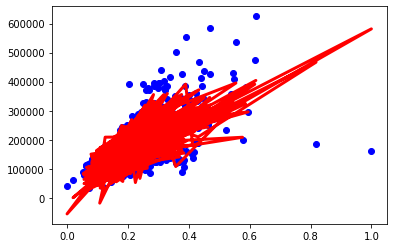

In [84]:
plt.scatter(top_15_numberic_features['GrLivArea'], y_train, color='blue')
plt.plot(top_15_numberic_features['GrLivArea'], y_pred_train, color='red', linewidth=3)
plt.show()

In [52]:
lasso1 = Lasso()
lasso1.fit(top_15_numberic_features, y_train)

ridge1 = Ridge()
ridge1.fit(top_15_numberic_features, y_train)

Ridge()

In [57]:
print("Number of non-zero Coefficients {}".format(np.sum(lasso1.coef_!=0)))
y_pred_train = lasso1.predict(top_15_numberic_features)
get_error_stats(y_train,y_pred_train)

y_pred_test = lasso1.predict(X_test[top_15_numberic_features.columns])
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 15
MSE Test 1288178446.4399586
MAE Score Test 22850.430819454796
R2 Score Test 0.777779365448089 

MSE Test 1551752736.1817923
MAE Score Test 24171.953123953674
R2 Score Test 0.7886296125675414 



(1551752736.1817923, 24171.953123953674, 0.7886296125675414)

In [58]:
print("Number of non-zero Coefficients {}".format(np.sum(ridge1.coef_!=0)))
y_pred_train = ridge1.predict(top_15_numberic_features)
get_error_stats(y_train,y_pred_train)

y_pred_test = ridge1.predict(X_test[top_15_numberic_features.columns])
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 15
MSE Test 1293981732.9386432
MAE Score Test 22851.51493001996
R2 Score Test 0.7767782541410428 

MSE Test 1574138929.539494
MAE Score Test 24091.780275357563
R2 Score Test 0.7855803004878358 



(1574138929.539494, 24091.780275357563, 0.7855803004878358)

In [ ]:
# lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
# for i in lambdas:
#   ridgereg=Ridge(aplha=i)
#   ridgereg.fit(X_poly,y)

In [66]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
Ridge = RidgeCV(alphas=arange(0, 1, 0.01),  cv=cv, scoring='neg_mean_absolute_error')

#fit model
Ridge.fit(top_15_numberic_features, y_train)

#display lambda that produced the lowest test MSE
print(Ridge.alpha_)

0.99


In [ ]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
Lasso = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)

#fit model
Lasso.fit(top_15_numberic_features, y_train)

#display lambda that produced the lowest test MSE
print(Lasso.alpha_)


In [68]:
print("Number of non-zero Coefficients {}".format(np.sum(ridge1.coef_!=0)))
y_pred_train = Ridge.predict(top_15_numberic_features)
get_error_stats(y_train,y_pred_train)

y_pred_test = Ridge.predict(X_test[top_15_numberic_features.columns])
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 15
MSE Test 1293888495.6316018
MAE Score Test 22850.826164748472
R2 Score Test 0.7767943382896263 

MSE Test 1573856383.5419376
MAE Score Test 24091.182077301997
R2 Score Test 0.7856187871974633 



(1573856383.5419376, 24091.182077301997, 0.7856187871974633)

In [69]:
print("Number of non-zero Coefficients {}".format(np.sum(ridge1.coef_!=0)))
y_pred_train = Lasso.predict(top_15_numberic_features)
get_error_stats(y_train,y_pred_train)

y_pred_test = Lasso.predict(X_test[top_15_numberic_features.columns])
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 15
MSE Test 1288178388.3260803
MAE Score Test 22850.429150734806
R2 Score Test 0.7777793754731774 

MSE Test 1551747192.3130205
MAE Score Test 24171.909857135164
R2 Score Test 0.7886303677198687 



(1551747192.3130205, 24171.909857135164, 0.7886303677198687)

In [77]:
alphas = np.array([0.01, 
                    0.001, 
                    0.0001, 
                    0.0002, 
                    0.0003, 
                    0.0004, 
                    0.0005])
 
# Create a parameter grid dictionary with hyperparameter values
paramgrid = {'alpha': alphas}
 
# Instantiate a Lasso regularized model 
model = Lasso()
 
# Instantiate the GridSearchCV method
grid = GridSearchCV(estimator = model, param_grid = paramgrid)
 
# Fit the data into model using GridSearchCV
grid.fit(top_15_numberic_features, y_train)
 
# Get the best score of Lasso regression model and print it
print('\n')
print('*' * 100)
print("The best score of the model using Lasso regresssion and given alpha values is: {0}".format(grid.best_score_))
print('*' * 100)
print('\n')
 
# Get the best score of hyperparameter alpha for Lasso regression and print it
print('*' * 100)
print("The best hyperparameter value for alpha for Lasso regression is: {0}".format(grid.best_estimator_.alpha))
print('*' * 100)
print('\n')



****************************************************************************************************
The best score of the model using Lasso regresssion and given alpha values is: 0.7464972677744942
****************************************************************************************************


****************************************************************************************************
The best hyperparameter value for alpha for Lasso regression is: 0.01
****************************************************************************************************


